In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Shared code for several exercises.

# These are the temperatures that all the exercises use.
temps = [1.0, 1.5, 2.0]

# Takes a 2D matrix of -1,1 values and a temperature and computes the exp(...) part of the ising model i.e. Ztemp * p(lattice).
def ising_exp_part(lattice, temp):
  sum = 1.0
  rows, cols = np.shape(lattice)

  for i in range(rows):
    sum *= ex1_func(lattice[i, :], temp)
  
  for j in range(cols):
    sum *= ex1_func(lattice[:, j], temp)

  return sum

# Decodes 0<=y<2**width into a row of -1,1's with the given width.
def y2row(y,width=8):
  if not 0<=y<=(2**width)-1:
    raise ValueError(y)
  my_str=np.binary_repr(y,width=width)
  my_list = list(map(int,my_str))
  my_array = np.asarray(my_list)
  my_array[my_array==0]=-1
  row=my_array
  return row

In [4]:
# Exercise 1.

def ex1_func(row_s, temp):
  return np.exp((1.0 / temp) * np.dot(row_s[:-1], row_s[1:]))

In [5]:
# Exercise 2.

def ex2_func(row_s, row_t, temp):
  return np.exp((1.0 / temp) * np.dot(row_s, row_t))

In [6]:
# Exercise 3.

def ztemp2x2(temp):
  R = [-1.0, 1.0]
  sum = 0.0

  for x11 in R:
    for x12 in R:
      for x21 in R:
        for x22 in R:
          lattice = np.array([[x11, x12],
                              [x21, x22]])
          sum += ising_exp_part(lattice, temp)

  return sum

for temp in temps:
  print(f"Temp = {temp} => Ztemp = {ztemp2x2(temp)}")

Temp = 1.0 => Ztemp = 121.23293134406595
Temp = 1.5 => Ztemp = 40.922799092745386
Temp = 2.0 => Ztemp = 27.04878276433453


In [7]:
# Exercise 4.

def ztemp3x3(temp):
  R = [-1.0, 1.0]
  sum = 0.0

  for x11 in R:
    for x12 in R:
      for x13 in R:
        for x21 in R:
          for x22 in R:
            for x23 in R:
              for x31 in R:
                for x32 in R:
                  for x33 in R:
                    lattice = np.array([[x11, x12, x13],
                                        [x21, x22, x23],
                                        [x31, x32, x33]])
                    sum += ising_exp_part(lattice, temp)

  return sum

for temp in temps:
  print(f"Temp = {temp} => Ztemp = {ztemp3x3(temp)}")

Temp = 1.0 => Ztemp = 365645.7491357705
Temp = 1.5 => Ztemp = 10565.421983514263
Temp = 2.0 => Ztemp = 2674.5181230600865


In [9]:
# Exercise 5.

def ztemp2x2_improved(temp):
  sum = 0.0

  for y1 in range(4):
    for y2 in range(4):
      y1_row = y2row(y1, 2)
      y2_row = y2row(y2, 2)
      sum += ex1_func(y1_row, temp) * ex1_func(y2_row, temp) * ex2_func(y1_row, y2_row, temp)

  return sum

for temp in temps:
  print(f"Temp = {temp} => Ztemp = {ztemp2x2_improved(temp)}")

Temp = 1.0 => Ztemp = 121.23293134406595
Temp = 1.5 => Ztemp = 40.922799092745386
Temp = 2.0 => Ztemp = 27.048782764334526


In [10]:
# Exercise 6.

def ztemp3x3_improved(temp):
  sum = 0.0

  for y1 in range(8):
    for y2 in range(8):
      for y3 in range(8):
        y1_row = y2row(y1, 3)
        y2_row = y2row(y2, 3)
        y3_row = y2row(y3, 3)
        sum += ex1_func(y1_row, temp) * ex1_func(y2_row, temp) * ex1_func(y3_row, temp) * ex2_func(y1_row, y2_row, temp) * ex2_func(y2_row, y3_row, temp)

  return sum

for temp in temps:
  print(f"Temp = {temp} => Ztemp = {ztemp3x3_improved(temp)}")

Temp = 1.0 => Ztemp = 365645.7491357704
Temp = 1.5 => Ztemp = 10565.421983514265
Temp = 2.0 => Ztemp = 2674.518123060087


In [11]:
# Exercise 7 function definitions.

# Caches a 1D array representation of the G function (ex1_func) and a 2D array representation of the function G(yk)*F(yk,yk+1) (f is ex2_func).
# Returns a tuple Gs, GFs.
def compute_Gs_and_GFs(dim, temp):
  value_range = 2**dim
  rows = [y2row(y, dim) for y in range(value_range)]
  Gs = np.array([ex1_func(rows[y], temp) for y in range(value_range)])
  GFs = np.array([[Gs[y] * ex2_func(rows[y], rows[y_next], temp) for y_next in range(value_range)] for y in range(value_range)])
  return Gs, GFs

# Computes the T-functions from the assignment for a dim x dim lattice and returns them in array form [T0,...,Tdim-1].
def compute_Ts(dim, Gs, GFs):
  value_range = np.shape(Gs)[0]
  Ts = [np.array([np.sum(GFs[:, y]) for y in range(value_range)])]
  
  for i in range(1, dim - 1):
    Ts.append(np.array([np.sum(Ts[i - 1] * GFs[:, y]) for y in range(value_range)]))

  Ts.append(np.sum(Ts[dim - 2] * Gs))
  return Ts

# Gets an array like the one output by compute_Ts and computes an array of the form [p0|1,...,pdim-2|dim-1,pdim-1].
def compute_pdfs(Ts, Gs, GFs):
  dim = len(Ts)
  value_range = np.shape(Gs)[0]
  ztemp = Ts[dim - 1]

  pdfs = [0] * dim
  pdfs[dim - 1] = (Ts[dim - 2] * Gs) / ztemp

  for i in reversed(range(1, dim - 1)):
    pdfs[i] = np.array([Ts[i - 1] * GFs[:, y] / Ts[i][y] for y in range(value_range)])

  pdfs[0] = np.array([GFs[:, y] / Ts[0][y] for y in range(value_range)])
  return pdfs

# Packages the previous functions since we're only really interested in keeping the pdfs in the end.
def compute_pdfs_directly(dim, temp):
  Gs, GFs = compute_Gs_and_GFs(dim, temp)
  Ts = compute_Ts(dim, Gs, GFs)
  return compute_pdfs(Ts, Gs, GFs)

# Gets an array like the one output by compute_pdfs and returns an array of samples from this probability distribution [y0,...,ydim-1].
def sample(pdfs):
  dim = len(pdfs)
  value_range = np.shape(pdfs[dim - 1])[0]
  sample = [0] * dim
  sample[dim - 1] = np.random.choice(value_range, p=pdfs[dim - 1])

  for i in reversed(range(dim - 1)):
    sample[i] = np.random.choice(value_range, p=pdfs[i][sample[i + 1], :])

  return sample

# Gets a 1D array sample from a markhov chain and transforms it into a 2D sample from an ising model lattice.
def sample_to_img(sample):
  dim = len(sample)
  img = np.array([y2row(s, dim) for s in sample])
  return img

# Packages the previous functions so you can quickly sample an image which is what we really care about.
def sample_img(pdfs):
  return sample_to_img(sample(pdfs))

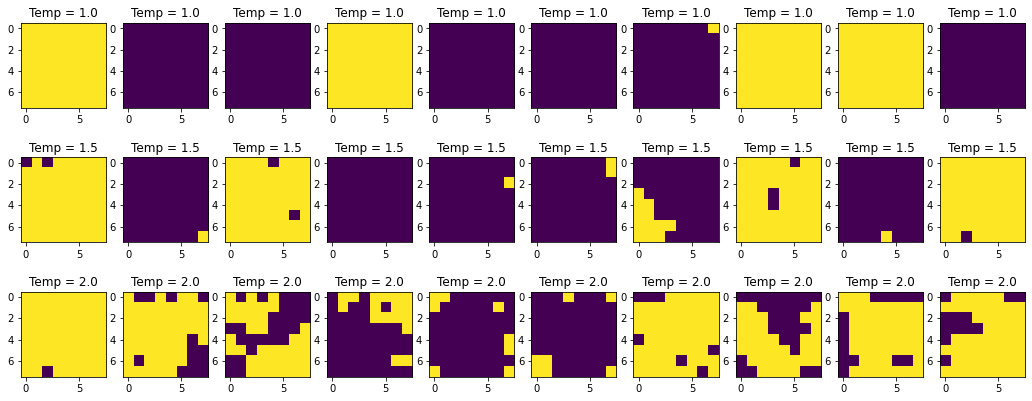

In [ ]:
# Exercise 7 outputs.

dim = 8
sample_count = 10
fig = plt.figure(figsize=(18, 7))

for i in range(len(temps)):
  pdfs = compute_pdfs_directly(dim, temps[i])

  for j in range(sample_count):
    fig.add_subplot(len(temps), sample_count, 1 + i*sample_count + j, title=f"Temp = {temps[i]}")
    plt.imshow(sample_img(pdfs), interpolation="none", vmin=-1.0, vmax=1.0)

In [12]:
# Exercise 8 function definitions.

# generate an arrey of sampels by given values
def make_samples(num_of_samples, dim, temp):
    sampels_arr = [None] * num_of_samples
    pdfs = compute_pdfs_directly(dim, temp)

    for i in range(len(sampels_arr)):
        sampels_arr[i] = sample_img(pdfs)

    return sampels_arr
    
# Packages the previous function for list of different temperatures
def make_samples_multi_temps(num_of_samples, dim, temps):
    sampels_array = [None] * len(temps)
    for i in range(len(temps)):
        sampels_array[i] = make_samples(num_of_samples, dim, temps[i])
    return sampels_array

In [ ]:
# Exercise 8 outputs.

dim = 8
sample_count = 10000
sampels_array = make_samples_multi_temps(sample_count, dim, temps)

avg_11_22 = [0.0, 0.0, 0.0]
avg_11_88 = [0.0, 0.0, 0.0]

for i in range(len(temps)):
    for j in range(sample_count):
        avg_11_22[i] += sampels_array[i][j][0][0] * sampels_array[i][j][1][1]
        avg_11_88[i] += sampels_array[i][j][0][0] * sampels_array[i][j][7][7]
    avg_11_22[i] = avg_11_22[i] / sample_count
    avg_11_88[i] = avg_11_88[i] / sample_count

for i in range(len(temps)):
    print(f"Temp = {temps[i]} => E'(x11*x22) = {avg_11_22[i]}, E'(x11*x88) = {avg_11_88[i]}")

Temp = 1.0 => E'(x11*x22) = 0.9492, E'(x11*x88) = 0.9016
Temp = 1.5 => E'(x11*x22) = 0.7668, E'(x11*x88) = 0.5344
Temp = 2.0 => E'(x11*x22) = 0.5018, E'(x11*x88) = 0.1304


In [13]:
# Exercise 9 function definitions.

# Returns true if the indices are in bounds of the matrix.
def in_bounds(matrix, i, j):
  rows, cols = np.shape(matrix)
  return 0 <= i < rows and 0 <= j < cols

# Computes a new more accurate sample for lattice[i, j].
def resample(lattice, temp, i, j):
  neighbor_indices = [(i + 1, j), (i - 1, j), (i, j + 1), (i, j - 1)]
  neighbors = np.array([lattice[i_tag, j_tag] for i_tag, j_tag in neighbor_indices if in_bounds(lattice, i_tag, j_tag)])
  probs = np.empty(2)
  probs[0] = np.exp((1.0 / temp) * np.sum(neighbors))
  probs[1] = 1.0 / probs[0]
  probs /= np.sum(probs) # This makes it so probabilities sum to 1.
  lattice[i, j] = np.random.choice([1, -1], p=probs)

    
# Refreshes the whole lattice with new values that distribute more like the true distribution.
def sweep(lattice, temp):
  rows, cols = np.shape(lattice)

  for i in range(rows):
    for j in range(cols):
      resample(lattice, temp, i, j)

# Returns a random dim x dim lattice which approximates the ising model with the given amount of sweeps.
def gibbs_sample(dim, temp, sweeps):
  lattice = np.random.randint(low=0, high=2, size=(dim, dim)) * 2 - 1

  for i in range(sweeps):
    sweep(lattice, temp)

  return lattice

# Computes the average of n samples from the average of n-1 samples and the new sample.
def add_to_avg(old_avg, sample_index, sample):
  return ((sample_index - 1) * old_avg + sample) / sample_index

In [ ]:
# Exercise 9 method 1.

for temp in temps:
  avg_11_22 = 0.0
  avg_11_88 = 0.0

  for i in range(10000):
    lattice = gibbs_sample(8, temp, 25)
    avg_11_22 = add_to_avg(avg_11_22, i + 1, lattice[0, 0] * lattice[1, 1])
    avg_11_88 = add_to_avg(avg_11_88, i + 1, lattice[0, 0] * lattice[7, 7])

  print(f"Temp = {temp} => E(x11*x22) = {avg_11_22}, E(x11*x88) = {avg_11_88}")

Temp = 1.0 => E(x11*x22) = 0.9335999999999998, E(x11*x88) = 0.5436000000000022
Temp = 1.5 => E(x11*x22) = 0.7498000000000004, E(x11*x88) = 0.3578000000000001
Temp = 2.0 => E(x11*x22) = 0.4984000000000006, E(x11*x88) = 0.08680000000000017


In [ ]:
# Exercise 9 method 2.

for temp in temps:
  avg_11_22 = 0.0
  avg_11_88 = 0.0
  lattice = gibbs_sample(8, temp, 100)

  for i in range(25 * 10000 - 100):
    sweep(lattice, temp)
    avg_11_22 = add_to_avg(avg_11_22, i + 1, lattice[0, 0] * lattice[1, 1])
    avg_11_88 = add_to_avg(avg_11_88, i + 1, lattice[0, 0] * lattice[7, 7])

  print(f"Temp = {temp} => E(x11*x22) = {avg_11_22}, E(x11*x88) = {avg_11_88}")

Temp = 1.0 => E(x11*x22) = 0.9517086834733895, E(x11*x88) = 0.9048179271708688
Temp = 1.5 => E(x11*x22) = 0.7689955982393015, E(x11*x88) = 0.555398159263711
Temp = 2.0 => E(x11*x22) = 0.5125570228091262, E(x11*x88) = 0.12135254101640659


In [15]:
# Exercise 10 function definitions.

# adds Gaussian noise values, sampled i.i.d. from N(0, 2^2) for a given lattice
def add_noise(lattice):
    rows, cols = np.shape(lattice)
    eta = 2 * np.random.standard_normal(size=(rows, cols))
    return lattice + eta

def get_indc(x):
    indc = 0
    if x == 1:
        indc = -1
    if x == -1:
        indc = 1
    return indc

# returns the sum of the neighbors of given cell
def sum_neighbors(lattice, i, j):
    neighbor_indices = [(i + 1, j), (i - 1, j), (i, j + 1), (i, j - 1)]
    neighbors = np.array([lattice[i_tag, j_tag] for i_tag, j_tag in neighbor_indices if in_bounds(lattice, i_tag, j_tag)])
    return np.sum(neighbors)


def find_mustly_likelihood(lattice):
    rows, cols = np.shape(lattice)
    lattice_ml = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            if lattice[i, j] > 0:
                lattice_ml[i, j] = 1
            else:
                lattice_ml[i, j] = -1
    return lattice_ml

def noise_resample(lattice_x, lattice_y, temp, variance, i, j):
    probs = np.empty(2)
    indc = get_indc(lattice_x[i, j])
    probs[0] = np.exp(((1.0 / temp) * sum_neighbors(lattice_x, i, j)) - (
                (1 / 2 * variance) * (lattice_y[i, j] + indc) * (lattice_y[i, j] + indc)))
    probs[1] = 1.0 / probs[0]
    probs /= np.sum(probs)  # This makes it so probabilities sum to 1.
    return np.random.choice([1, -1], p=probs)

def find_icm(lattice_x, lattice_y, temp, variance, steps):
    rows, cols = np.shape(lattice_y)
    lattice = np.zeros((rows, cols))

    for n in range(steps):
        for i in range(rows):
            for j in range(cols):
                lattice[i, j] = noise_resample(lattice_x, lattice_y, temp, variance, i, j)

    return lattice

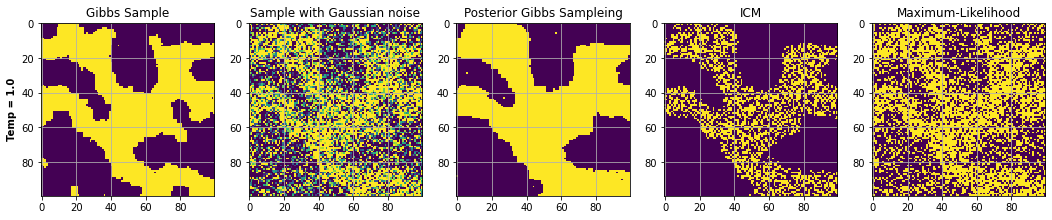

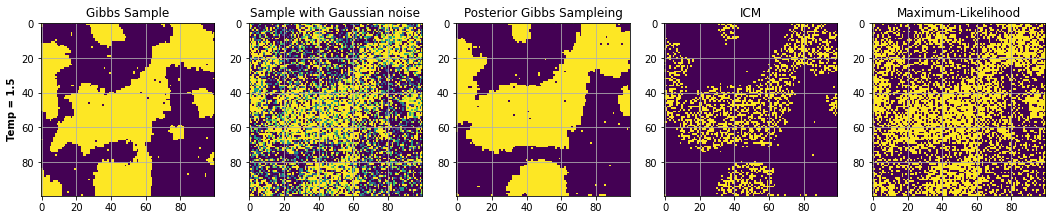

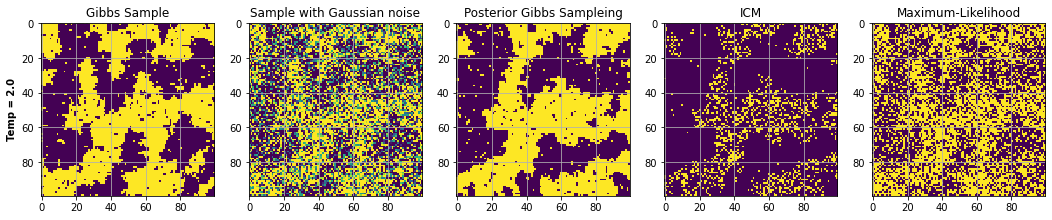

In [17]:
# Exercise 10 output.

size = 100
steps = 50
variance = 4

for temp in temps:
  lattice_x = np.zeros((size, size))
  lattice_n = np.zeros((size, size))
  lattice_ml = np.zeros((size, size))

  # generate size*size sample from Ising-model and adds Gaussian noise i.i.d.
  lattice = gibbs_sample(size, temp, steps)
  lattice_y = add_noise(lattice)

  # generate a sample from the posterior distribution using Gibbs sampling.
  for i in range(size):
    for j in range(size):
      lattice_x[i, j] = lattice_y[i, j]
  for n in range(steps):
    sweep(lattice_x, temp)

  for i in range(size):
    for j in range(size):
      lattice_n[i, j] = lattice_x[i, j]
  lattice_x_new = find_icm(lattice_n, lattice_y, temp, variance, 5)

  lattice_ml = find_mustly_likelihood(lattice_y)

  titles = [ 'Gibbs Sample', 'Sample with Gaussian noise', 'Posterior Gibbs Sampleing', 'ICM', 'Maximum-Likelihood' ]
  lattices = [ lattice, lattice_y, lattice_x, lattice_x_new, lattice_ml ]
  fig, axs = plt.subplots(1, 5, figsize=(18, 7))
  axs[0].set_ylabel(f"Temp = {temp}", fontweight ="bold")

  for ax, title, latt in zip(axs, titles, lattices):
    ax.imshow(latt, interpolation="none", vmin=-1.0, vmax=1.0)
    ax.set_title(title)
    ax.grid(True)

plt.show()